In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [0]:
raw_data = pd.read_csv('nba.csv')

In [51]:
raw_data.head()

,Unnamed: 0,player,team,atm_away,atm_home,score_away,score_home,atm_total,score_total
0,7,A. Johnson,ATL,30,34,24,28,64,52
1,10,A. Johnson,TOR,63,57,44,38,120,82
2,15,Abdur-Rahim,SAC,114,124,84,90,238,174
3,22,Afflalo,DEN,236,284,189,227,520,416
4,23,Afflalo,DET,75,88,62,67,163,129


In [0]:
# Сгруппируем игроков по имени
raw_data = raw_data.groupby('player').agg(sum)

In [53]:
raw_data.describe()

,Unnamed: 0,atm_away,atm_home,score_away,score_home,atm_total,score_total
count,458.00000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,1742.91048,379.384279,401.312227,288.495633,305.875546,780.696507,594.371179
std,2123.93616,460.404119,482.857342,356.981169,373.920304,941.639037,729.557383
min,15.00000,14.000000,14.000000,7.000000,6.000000,51.000000,25.000000
25%,587.75000,85.250000,88.000000,60.000000,60.250000,174.250000,124.000000
50%,1140.50000,210.500000,231.500000,153.000000,165.500000,442.500000,334.000000
75%,2089.50000,474.750000,522.500000,356.000000,399.750000,1016.250000,754.750000
max,21586.00000,3512.000000,3338.000000,2806.000000,2626.000000,6830.000000,5432.000000


Из статистики данных мы видим, что разброс числа бросков и попаданий очень большой. Пользоваться такими данными нецелесообразно, так как разные игроки могли играть разное количество игр, а в зависимости от их роли могло быть разным и число попыток забросить мяч. Поэтому мерой "успешности" игры мы будем считать долю успешных бросков.

In [0]:
data = pd.DataFrame({'away': raw_data['score_away'] / raw_data['atm_away'],
                     'home': raw_data['score_home'] / raw_data['atm_home']})

In [55]:
data.head()

,away,home
player,,
A. Johnson,0.731183,0.725275
Abdur-Rahim,0.736842,0.725806
Afflalo,0.807074,0.790323
Aldridge,0.754171,0.795745
Alexander,0.666667,0.723404


Рассмотрим разности этих столбцов. Если разницы, где играть, нет, то распределение должно получиться центрированным и симметричным.

In [0]:
difference = data['away'] - data['home']

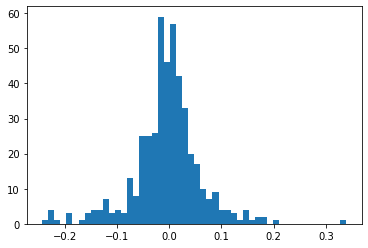

In [57]:
plt.hist(difference, bins=50)
plt.show()

Рассмотрим гистограммы столбцов. Если разницы, где играть, нет, гистограммы должны примерно совпадать.

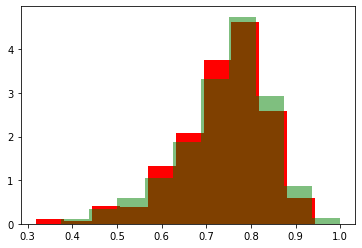

In [58]:
_ = plt.hist(data['away'], color='r', density=True)
_ = plt.hist(data['home'], color='g', alpha=0.5, density=True)

Для этой задачи применим Z-критерий для разности двух долей

In [0]:
from statsmodels.stats.proportion import proportions_ztest

In [0]:
p_values = []
for _, item in raw_data.iterrows():
  _, pval = proportions_ztest((item['score_away'], item['score_home']), 
                              (item['atm_away'], item['atm_home']), alternative='two-sided')
  p_values.append(pval)

In [62]:
import numpy as np
p_values = np.asarray(p_values)
(p_values < 0.05).sum()

32

Таким образом, гипотезу о том, что игроки играют одинаково везде, можно отвергнуть для 32 игроков.

Посмотрим, как изменится результат, в зависимости от поправки на множественность гипотез.

In [0]:
from statsmodels.stats.multitest import multipletests

In [66]:
for method in ['bonferroni', 'holm', 'fdr_bh']:
  print(multipletests(p_values, method=method)[0].sum())

1
1
1


Таким образом для всех трех методов может быть отвергнута только одна гипотеза